<a href="https://colab.research.google.com/github/swapnalisingh13/LLM_MiniProj/blob/main/Extract_LLM_565_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q -U google-generativeai

In [2]:
import google.generativeai as genai

## SET API KEY

In [3]:
# Used to securely store your API key
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

## LIST OF MODELS

In [4]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-8b-exp-0827


In [5]:
# Model Configuration
MODEL_CONFIG = {
  "temperature": 0.2,
  "top_p": 1,
  "top_k": 32,
  "max_output_tokens": 4096,
}

## Safety Settings of Model
safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  }
]

## LOAD GEMINI MODEL WITH MODEL CONFIGURATIONS

In [6]:
model = genai.GenerativeModel(model_name = "gemini-1.5-flash",
                              generation_config = MODEL_CONFIG,
                              safety_settings = safety_settings)

## DEFINE IMAGE FORMAT TO INPUT IN GEMINI

In [7]:
from pathlib import Path

def image_format(image_path):
    img = Path(image_path)

    if not img.exists():
        raise FileNotFoundError(f"Could not find image: {img}")

    image_parts = [
        {
            "mime_type": "image/png", ## Mime type are PNG - image/png. JPEG - image/jpeg. WEBP - image/webp
            "data": img.read_bytes()
        }
    ]
    return image_parts


## GEMINI MODEL OUTPUT

In [8]:
def gemini_output(image_path, system_prompt, user_prompt):

    image_info = image_format(image_path)
    input_prompt= [system_prompt, image_info[0], user_prompt]
    response = model.generate_content(input_prompt)
    return response.text

### EXTRACTING PART OF THE INFORMATION FROM INVOICE

In [10]:
system_prompt = """
               You are a specialist in comprehending receipts.
               Input images in the form of receipts will be provided to you,
               and your task is to respond to questions based on the content of the input image.
               """

image_path = "/content/invoice.png"
user_prompt = "What is the balance amount in the image?"
gemini_output(image_path, system_prompt, user_prompt)

'The balance amount is $154.06.'

In [11]:
user_prompt = "Whose name is in the bill?"

gemini_output(image_path, system_prompt, user_prompt)

'The name in the bill is John Smith.'

## EXTRACTING WHOLE DATA IN JSON FROM INVOICE

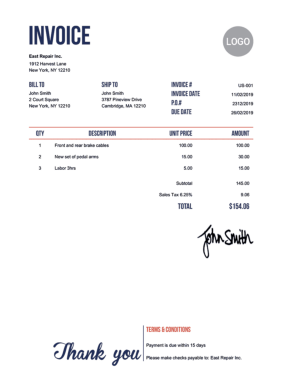

In [20]:
import matplotlib.pyplot as plt
image_path = "/content/invoice.png"
image = plt.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

In [12]:
system_prompt = """
               You are a specialist in comprehending receipts.
               Input images in the form of receipts will be provided to you,
               and your task is to respond to questions based on the content of the input image.
               """
#system_prompt = "Convert Invoice data into json format with appropriate json tags as required for the data in image "
image_path = "/content/invoice.png"
user_prompt = "Convert Invoice data into json format with appropriate json tags as required for the data in image "

In [13]:
output = gemini_output(image_path, system_prompt, user_prompt)

In [ ]:
from IPython.display import Markdown
Markdown(output)

```json
{"BILL TO": "John Smith\n2 Court Square\nNew York, NY 12210", "SHIP TO": "John Smith\n3787 Pineview Drive\nCambridge, MA 12210", "INVOICE #": "US-001", "INVOICE DATE": "11/02/2019", "P.O.#": "2312/2019", "DUE DATE": "26/02/2019", "QTY": "1", "DESCRIPTION": "Front and rear brake cables", "UNIT PRICE": "100.00", "AMOUNT": "100.00", "QTY": "2", "DESCRIPTION": "New set of pedal arms", "UNIT PRICE": "15.00", "AMOUNT": "30.00", "QTY": "3", "DESCRIPTION": "Labor 3hrs", "UNIT PRICE": "5.00", "AMOUNT": "15.00", "Subtotal": "145.00", "Sales Tax 6.25%": "9.06", "TOTAL": "154.06"}
```

Analyzing Medical Images

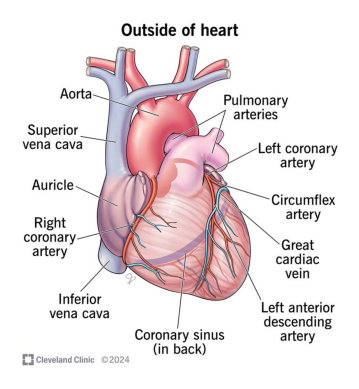

In [23]:
image_path = "/content/heart.jpg"
image = plt.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
system_prompt = """
               You are a specialist in comprehending medical images.
               Input images in the form of labelled images will be provided to you,
               and your task is to respond to questions based on the content of the input image.
               """

image_path = "/content/heart.jpg"
user_prompt = "What is the image about?"
gemini_output(image_path, system_prompt, user_prompt)

'The image is a diagram of the human heart, showing the major arteries and veins that supply blood to the heart. It also shows the coronary sinus, which is a large vein that collects blood from the heart muscle. The image is labeled with the names of the different structures.'

In [ ]:
user_prompt = "What part comes in label after aorta?"
gemini_output(image_path, system_prompt, user_prompt)

'Pulmonary arteries.'

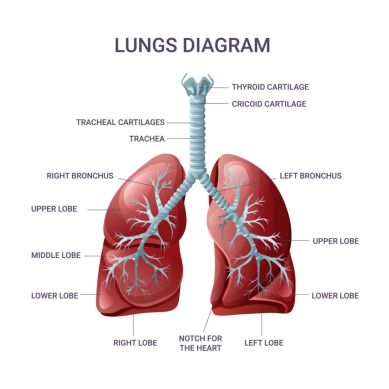

In [24]:
image_path = "/content/lungs.jpg"
image = plt.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
image_path = "/content/lungs.jpg"
user_prompt = "What is the image about?"
gemini_output(image_path, system_prompt, user_prompt)

'The image is a diagram of the lungs. It shows the trachea, bronchi, and lobes of the lungs. It also shows the thyroid and cricoid cartilages.'

In [ ]:
user_prompt = "What is above Trachea?"
gemini_output(image_path, system_prompt, user_prompt)

'Tracheal Cartilages.'

Analyzing shapes in images

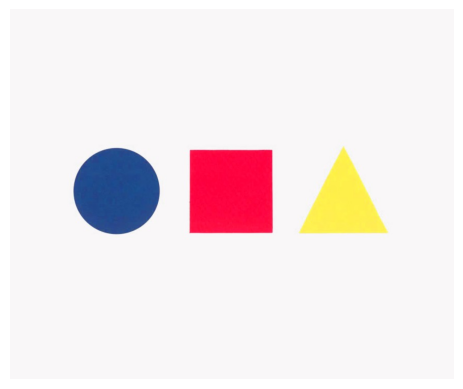

In [25]:
image_path = "/content/random.jpeg"
image = plt.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

In [14]:
system_prompt = """
               You are a specialist in comprehending images.
               Input images in the form of labelled images will be provided to you,
               and your task is to respond to questions based on the content of the input image.
               """

image_path = "/content/random.jpeg"
user_prompt = "What is shape in red color?"
gemini_output(image_path, system_prompt, user_prompt)

'The shape in red color is a square.'

In [15]:
image_path = "/content/random.jpeg"
user_prompt = "What is shape in black color?"
gemini_output(image_path, system_prompt, user_prompt)

'There is no shape in black color in the image.'

In [16]:
image_path = "/content/random.jpeg"
user_prompt = "What is shape in yellow color?"
gemini_output(image_path, system_prompt, user_prompt)

'Triangle.'